In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import glob
from annotator_amide_trans import annotator
from annotator_amide_abs import annotator_full
%matplotlib widget

In [5]:
extract_trials = glob.glob("./protein_extract_spectra/*_scan**.csv")
e_scan_16, e_scan_24, e_scan_32, e_scan_48, e_scan_64, e_scan_72 = [pd.read_csv(path) for path in extract_trials]
pooled_e = [e_scan_16, e_scan_24, e_scan_32, e_scan_48, e_scan_64, e_scan_72]

kgy0_72 = pd.read_csv("../irradiated_analysis/spectral_files/0kGy_sn72.csv")
wavenumber = pd.read_csv("./protein_extract_spectra/wave_no.csv")

kgy0_72['average'] = kgy0_72.mean(axis=1)

for scan_trial in pooled_e:
    scan_trial['average'] = scan_trial.mean(axis=1)

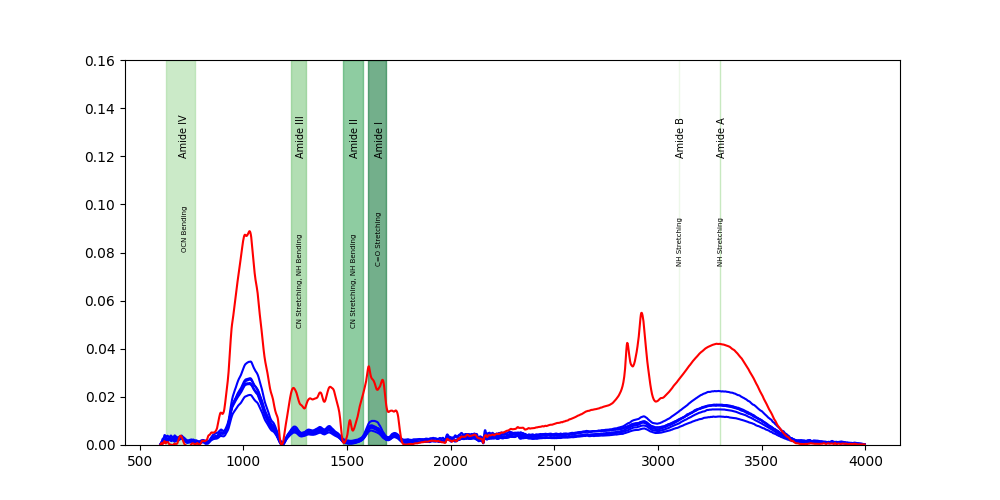

In [10]:
p_v_e, axis = plt.subplots(1,1, figsize=(10,5))

for scan_no in pooled_e:
    ave_spec = scan_no['average']
    axis.plot(wavenumber, ave_spec, color='blue')

axis.plot(wavenumber, kgy0_72['average'], color='red')

annotator_full(axis)